In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('cricket score.csv')

In [3]:
df.head()

,Overs,Runs
0,1,16
1,2,5
2,3,17
3,4,25
4,5,17


In [4]:
df.columns

Index(['Overs', 'Runs'], dtype='object')

### n_estimators:int, default=100
The number of base estimators in the ensemble.

### max_samples“auto”, int or float, default=”auto”
The number of samples to draw from X to train each base estimator.
If int, then draw max_samples samples.

If float, then draw max_samples * X.shape[0] samples.

If “auto”, then max_samples=min(256, n_samples).

If max_samples is larger than the number of samples provided, all samples will be used for all trees (no sampling)

### contamination:‘auto’ or float, default=’auto’
The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the 
threshold on the scores of the samples.

If ‘auto’, the threshold is determined as in the original paper.

If float, the contamination should be in the range (0, 0.5].

Changed in version 0.22: The default value of contamination changed from 0.1 to 'auto'.

### max_features:int or float, default=1.0
The number of features to draw from X to train each base estimator.

If int, then draw max_features features.

If float, then draw max_features * X.shape[1] features.

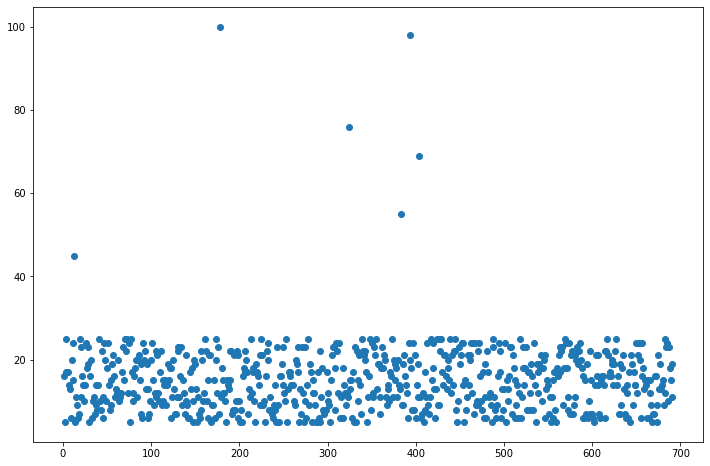

In [5]:
x=df["Overs"]
y=df["Runs"]
plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.show()

In [6]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.01),max_features=1.0)
model.fit(df[['Runs']])

C:\Users\Preetam\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_estimators=1000)

In [7]:
df['scores']=model.decision_function(df[['Runs']])
df['anomaly']=model.predict(df[['Runs']])
df.head(20)

,Overs,Runs,scores,anomaly
0,1,16,0.080714,1
1,2,5,0.000000,1
2,3,17,0.083253,1
3,4,25,0.002747,1
4,5,17,0.083253,1
5,6,17,0.083253,1
6,7,14,0.092551,1
7,8,13,0.065029,1
8,9,6,0.047867,1
9,10,20,0.063449,1


In [8]:
outliers_counter = len(df[df['Runs'] > 36])
outliers_counter

6

In [9]:
df[df["Runs"]>36]

,Overs,Runs,scores,anomaly
12,13,45,-0.172530,-1
177,178,100,-0.301890,-1
323,324,76,-0.277754,-1
382,383,55,-0.222937,-1
393,394,98,-0.300908,-1
403,404,69,-0.264216,-1
